# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

RM:
The larger number of rooms should generally increase the value of home given that the house size is also larger. In other words, a small house with large number of rooms may not actually be as valuable.

LSTAT:
This feature most likely has the impact on houses prices. The more people of "lower class" live in a neighborhood the lower house prices should likely be.

PTRATIO:
In high-value neighborhoods, the ratio will likely be smaller. This will translate to fewer students to teachers, thus implying that teachers are likely paid more. But where does this money come from? Probably from higher taxes that more well-off people can afford, which in turn would indicate that those people live in more expensive houses.

<b>Reviewer:</b><br><i>
Nice observations for the features in this dataset. As we can confirm these ideas by plotting each feature vs MEDV housing prices.</i>

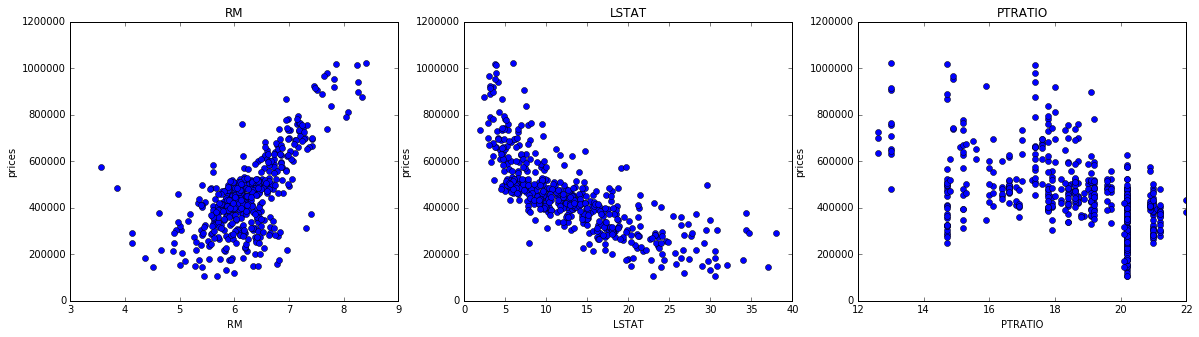

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i + 1)
    plt.plot(data[col], prices, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [5]:
# TODO: Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [6]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


This model is successful because the features explain 92% of the variation in the target variable, which is very high.

<b>Review:</b><br>
<i>
I would agree that the model does a great job explaining variation in the target variable. However, there are only 5 data points so it may be too early to classify the model as successful. It's definitely a promising result though!

Code Note: We can also check out the linear relationship between the 'True Values' and 'Predictions' with a plot
</i>

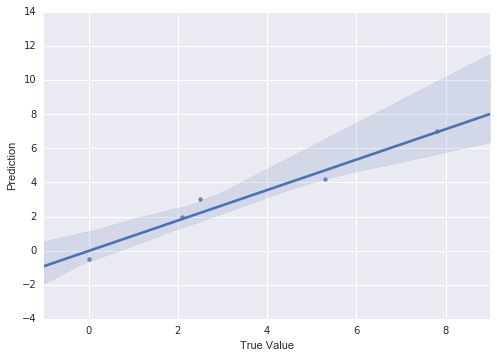

In [10]:
import seaborn as sns

sample_df = pd.DataFrame([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3]).reset_index()
sample_df.columns = ['True Value', 'Prediction']
sns.regplot('True Value', 'Prediction', sample_df)

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [22]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(features.values, prices, test_size=0.2, random_state=0) 

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

We need to split the dataset in training and testing subsets so as to evaluate how the trained model performs on unseen data. Without validating the model, we are not certain if model predictions are any good.

<b>Review:</b><br>
<i>
There are two distinct benefits when splitting the dataset into training and testing:

1. Assess the ability of the model to generalize over unseen data. (Well done with this one)
2. Serve as check on over fitting.

As we definitely need to protect against overfitting
As we can get a good estimate of our generalization accuracy on this testing dataset
As our main goal is to accurately predict on new unseen data
</i>

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

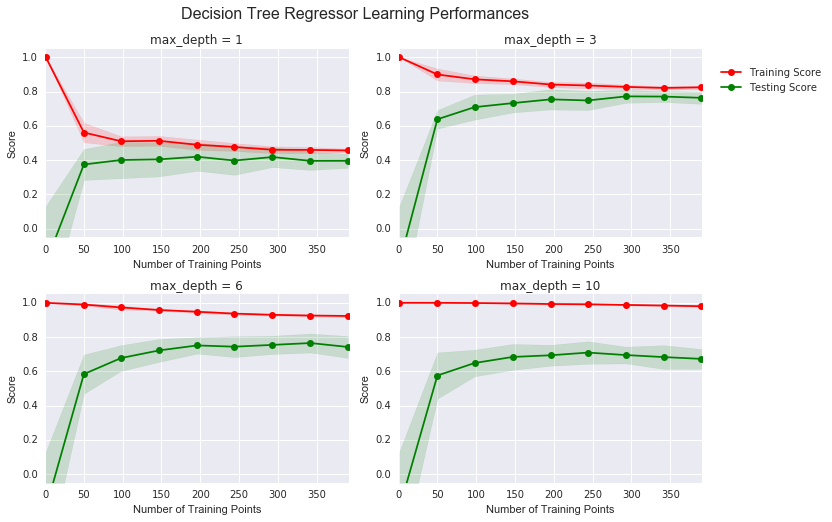

In [13]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

The graph at low-left has a maximum depth of 6.
The training score converges to about .9, while the testing score converges to about .7. At those levels, both scores require approximately 150 samples. The gap of .2 indicates that the model is overfitted and has poor prediction performance. Model performance will not increase with more data points as the training and testing scores already hit the plateau.

<b>Previous, not entirely correct conclusion</b><br>
I'd like to see what happens to that curve after more data is added while using depth of 6. But since it's not an option here, here is some more thought given my level of expertise.
The graph shows that the model has high variance. This is indicated by a large gap between both curves. Two ways to address that is (1) reduce the complexity or (2) add more data. Since if we stick to keeping the same complexity (depth 6), adding more data may train the model for better prediction accuracy. The course notes state: "we should generally see performance improve as the number of training points increases". Therefore, I think that adding more data is useful. Once both training and testing curves plateau, and stop converging to some point, there is no use of adding more data, and we can conclude that with the given level of complexity the model has learned all what it could. But by looking at the graph with 400 points, and the training curve's tendency downward, it seems that the model can benefit from more data.

<b>Review:</b><br>
<i>
<ol>
<li>
I'm not sure I fully get the rationale behind: " Adding more samples may help when the model has high variance. In case of high bias, adding more features could be more beneficial.". The question here requires specifically to state whether, in your chosen plot, adding more data is useful or not. What happens when more data is added? Does it make sense to add more data indefinitely or does the model seem to have learned what it could learn at some point?
</li>
<li>
It isn't a truism that more data will always increase a model's performance. In this case, we have three features. This means that the theoretical maximum amount of data that might be needed to populate the hypothesis space is 10^3 or 1000 data points. In this case, the data is noisy, but not particularly sparse so we see the testing curve level off around ~150 training data points. Your own analysis indicates that you're not seeing any increase in performance with further increasing the training data. This is the correct answer here.
</li>
<li>
Nice description of the training and testing curves here(although a bit scattered around). As we seem to be memorizing the training data in the beginning phases then we start to generalize a bit better(but still tend to overfit the data). You are also correct with the comment of " Model performance will not increase with more data points as the training and testing scores already hit the plateau." As it is clear that the testing curve has converged to its optimal value, thus more data points would not benefit the model.

Note: In general this is true "Adding more samples may help when the model has high variance. In case of high bias, adding more features could be more beneficial." But in this instance more samples won't really help.
</li>

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

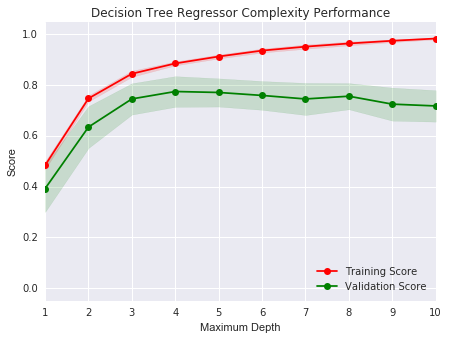

In [12]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

The model with the depth of 1 has high bias due to low accuracy (~40%) for both training and testing data.

The model trained with the depth of 10 suffers from high variance because there is a large gap in accuracy between the curves. The training score is high while the test score is significantly lower indicating that the model doesn't generalize well to unseen data.

<b>Review</b><br>
<i>
<ol>
<li>Absolutely correct! It's also worth noting that the max depth of 10 model is overfitting as it seems to be memorizing the training data rather than generalizing to patterns in the training data.</li>
<li>
<ul><br>
<li>As a max_depth of 1 suffers from high bias, visually this is due to the low training and validation scores(also note that they are close together).</li>
<li>And a max_depth of 10 suffers from high variance, since we see a large gap between the training and validation scores, as we are basically just memorizing our training data and will not generalize well to new unseen data</li>
</ul><br>
Also consider this visual as it is a good representation for the fit for both
</li>
</i>
![title](overfitting-your-forecasts-may-not-be-as-good-as-the-measure-tells-you-12-728.jpg)

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

The depth of 4 is the best because the validation score is the highest here (~ 75%). Increasing complexity will not improve the prediction ability because the validation curve plateaus at this level of depth, but the training score increases. This will cause the model to get overfitted.

<b>Ambiguious</b><br>
To lay out my thinking further: around depth 3-4, the validation score plateaus, yet the training score keeps going up. Both curves begin to diverge. This is a sign where adding more depth will not improve the performance. The highest accuracy for predicting can be achieved at this point/depth. This is the point where R squared for predicting ability is maximized.

<b>Review</b><br>
<i>
<ol>
<li>
The answer might be correct (it can vary between 3 and 4 according to the random split) I’m not sure about the rationale though when stating: “seems to be around 3 where the gap between train and test curves is small while the accuracy is high, around 80%” it is a bit ambiguous in terms of clearly indicating how to select the best max depth.
Please remind that the best model that generalizes the dataset is to be found at the max_depth where the validation R squared is maximized: Increasing complexity further does not improve the R squared, most of the times it actually reduces it. We always look for the least complex model that maximises the R squared.
</li>
<li>
For this question, it is required that students pick a single 'best-guess' model. Rather than saying around 3 or 3-4, just pick a single model. In general, the best model will be the simplest model with the highest validation score. However, for this question, you could choose either 3 or 4 (I think both can be argued)...just be sure to justify it based on the model complexity graph.
</li>
<li>
Nice job as this is solid justification. We(and GridSearch) are looking for the highest validation score. Also note that we are looking for the best bias / variance tradeoff(smallest gap between them).

Thus check out this visual, as it refers to error but same can be applied to accuracy(just flipped)
</li>
</ol>
![title](biasvariance.png)

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

Grid search technique is a way to tune algorithm parameters so as to find most optimal combination that results in higher accuracy.
The grid search is supplied with a map of parameters/values so as to evaluate the prediction accuracy by running a learning algorithm with different combination. The search then picks the best-performing combination.

<b>Review</b><br>
<i>
<ol>
<li>http://scikit-learn.org/stable/modules/grid_search.html
Pro tip: There are other techniques that could be used for hyperparameter optimization in order to save time like RandomizedSearchCV, in this case instead of exploring the whole parameter space just a fixed number of parameter settings is sampled from the specified distributions. This proves useful when we need to save time but is not necessary in cases in cases like ours where the data set is relatively small.</li>
<li>Would as recommend stating the exhaustive nature of this algorithm. As GridSearch simply is an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.</li>
</ol>
</i>

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

K-fold cross-validation splits the input data into equal chunks, then uses k - 1 chunk for training set and one for the testing set. The process repeats until each chunk was used for testing set (the rest for training set). The goal is to find optimal combination of parameters for model performance. It also helps to minimize the error in model when data is partitioned/clustered in some way.

<b>Review</b><br>
<i>
<ol>
<li>Ideally with you would mention that the results from the k sets are averaged out when looking for the optimal solution.
Another advantage that stems from using k fold cross validation with grid search is that, when a dataset is limited in size, cross validation becomes extremely useful as it allows for an extensive exploitation of all the available data. This way that we can measure the real potential of our algorithm in terms of performance metrics.</li>
<li>To expand on your comment of "It also helps to minimize the error in model when data is partitioned/clustered in some way."

This is an extremely important concept in machine learning, as this allows for multiple testing datasets and is not just reliant on the particular subset of partitioned data. Thus cross-validation better estimates the volatility by giving you the average error rate and will better represent generalization error.

If you would like a full run example, run this code based on the iris data set in your python shell or something and examine the print statements, as this is a great example</li>
</ol>
</i>

In [27]:
import numpy as np
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm

def minimize_error():
    iris = datasets.load_iris()

    # Split the iris data into train/test data sets with 30% reserved for testing
    X_train, X_test, y_train, y_test = \
        cross_validation.train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

    # Build an SVC model for predicting iris classifications using training data
    clf = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train)

    # Now measure its performance with the test data with single subset
    print clf.score(X_test, y_test) 

    # We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
    scores = cross_validation.cross_val_score(clf, iris.data, iris.target, cv=5)

    # Print the accuracy for each fold:
    print scores

    # And the mean accuracy of all 5 folds:
    print scores.mean()
    
#minize_error()

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [28]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = { 'max_depth': np.arange(1,11) }

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

<b>Review</b><br><i>
Would also recommend setting a random_state in your DecisionTreeRegressor:<br>
<code>regressor = DecisionTreeRegressor(random_state = "any number")</code>

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [29]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


The optimal model has the depth of 4 according to the grid search. This and my guess are about the same.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [30]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


For reference, here are the stats:

Minimum price: \$105,000.00<br />
Maximum price: \$1,024,800.00<br />
Mean price: \$454,342.94<br />
Median price \$438,900.00<br />
Standard deviation of prices: \$165,171.13<br />

Predicted prices appear to be reasonable.

Client 1: Mid-range given that poverty level, student-teacher ratio and somewhere in-between the other two. The predicted price of the house (\$391,183) lies close to the mean and within one standard deviation of the mean price (\$454,342 +/- \$165,171). This would mean, 68% of actual prices would fall in this range.

Client 2: Since the neighborhood has the highest poverty level, student-teacher ratio, it is evident that the house price will be quite low. Since the actual minimum price is \$105,000, and the predicted price gravitates closer to that amount, the feature values and the outcome of prediction are reasonable.

Client 3: The house is likely located in an upscale area, where poverty is low, education is better. Moreover, the house has 8 rooms. Therefore, the price on the house is expected to be high. The reasoning is similar to that for client 2, but in the opposite direction. The highest actual price is over one million dollars, the predicted price is just below it and such combination features all indicate that the model prediction is a reasonably good estimate.

<b>Reviewer</b><br><i>
<ol>
<li>Pro tip: To assess if your prediction is reasonable, besides from comparing it with the median, the mean and checking if it is included in one standard deviation range, you could use SKlearn to find the nearest neighbours of the feature vector. You can then contrast your results with the closest neighbours, the ones that have similar characteristics.
See code below
http://scikit-learn.org/stable/modules/neighbors.html#finding-the-nearest-neighbors</li>
<li>There's a small change that you should make here. The question requires that you use the previously calculated statistics to justify your answer ("Use the statistics you calculated in the Data Exploration section to help justify your response"). Your analysis here is excellent, but you should use the mean/median/min/max etc.

You could note that the mid-range client has a value near the mean/median. You could note that the poor/rich clients have predicted housing prices near the calculated min/max for the dataset.

I'd note that while this may seem like a silly exercise, this is a very useful thought process that many machine learning engineers use when the data and models become much more complicated. It is important to perform a 'sanity check' on your model's predictions to make sure that the results make sense. Sometimes, a bug or edge case can cause a model to make non-sensical predictions and this type of thought process will help to prevent large errors.</li>
<li>Good. Comparing these predicted prices to the descriptive stats of the housing price and the features of the dataset are a fair assumption on why the prices seems reasonable. Just remember to keep in mind the error rate for the test set here.

You could also compute descriptive stats of the features with:<br>
</i>
</li>

In [32]:
features.describe()

,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


<b>Pro Tip:</b><br><i>We can also plot a histogram of all of the housing prices in this dataset and see where each of these predictions fall

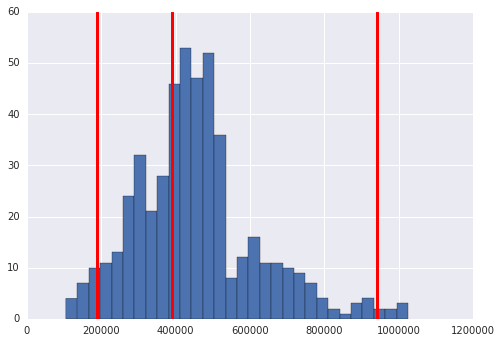

In [34]:
import matplotlib.pyplot as plt
plt.hist(prices, bins = 30)
for price in reg.predict(client_data):
    plt.axvline(price, c = 'r', lw = 3)

In [35]:
from sklearn.neighbors import NearestNeighbors
num_neighbors=5
def nearest_neighbor_price(x):
    def find_nearest_neighbor_indexes(x, X):  # x is your vector and X is the data set.
        neigh = NearestNeighbors( num_neighbors )
        neigh.fit(X)
        distance, indexes = neigh.kneighbors( x )
        return indexes
    indexes = find_nearest_neighbor_indexes(x, features)
    sum_prices = []
    for i in indexes:
        sum_prices.append(prices[i])
    neighbor_avg = np.mean(sum_prices)
    return neighbor_avg
print nearest_neighbor_price( [4, 55, 22])
index = 0  
for i in client_data:
    val=nearest_neighbor_price(i)
    index += 1
    print "The predicted {} nearest neighbors price for home {} is: ${:,.2f}".format(num_neighbors,index, val)

280980.0
The predicted 5 nearest neighbors price for home 1 is: $372,540.00
The predicted 5 nearest neighbors price for home 2 is: $162,120.00
The predicted 5 nearest neighbors price for home 3 is: $897,120.00


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [36]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

The model as is should not be used today. Most likely, many parameters have changed for over 30 years. House prices could have gone up in one neighborhood, but gotten worse in another.

More up-to-date stats and features should be added to the data. For example, house/lot size, proximity of schools, natural features, etc. Those that usually affect the house price.

Given the data and its features (deviation from the average price is around \$165000), the model is robust enough: the range is around \$69000. Although, in reality that looks pretty big. To narrow the range, the model would benefit from having more features.

The data applicable to a property in a rural city would be similar. But more features need to be added to make equivalent comparisons of properties (e.g., lot size).

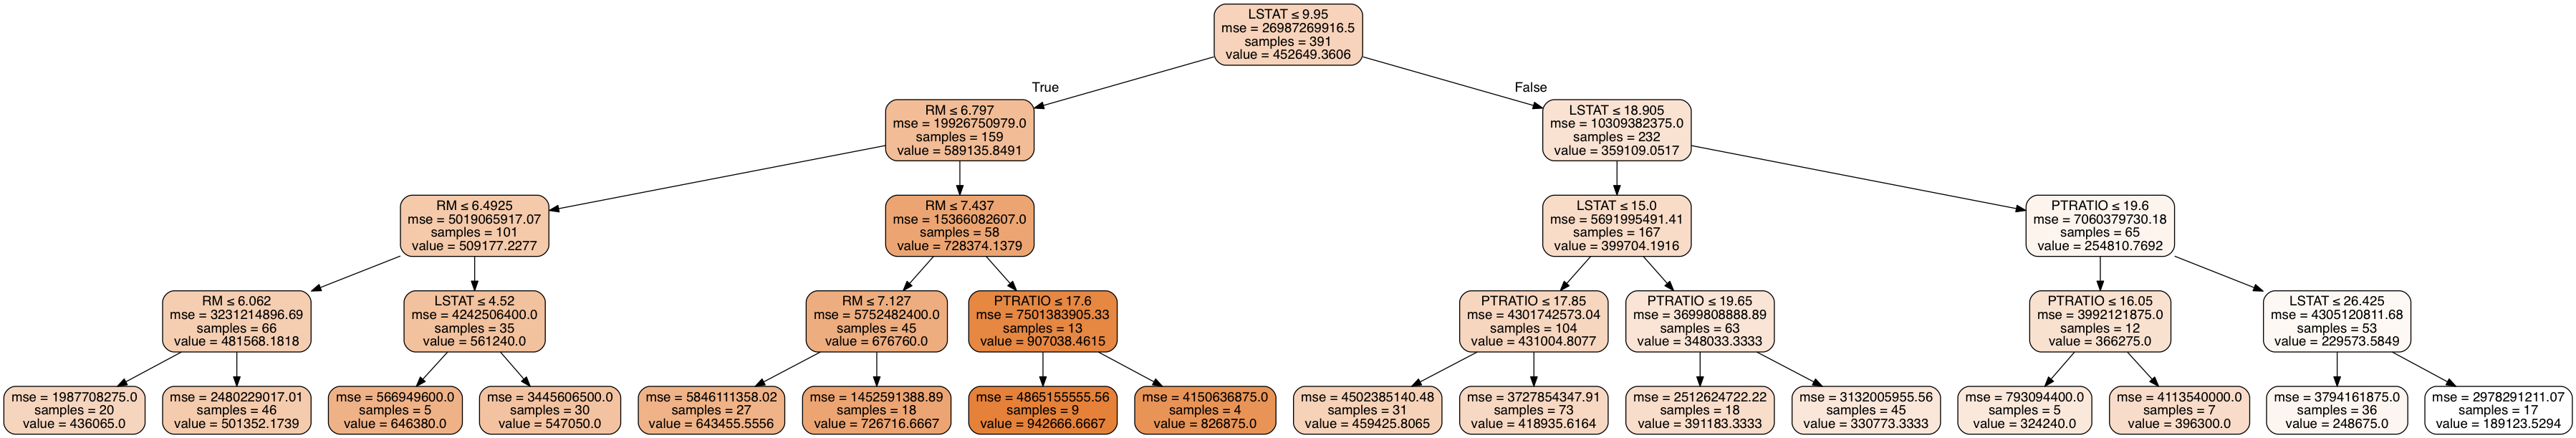

In [57]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree

clf = DecisionTreeRegressor(max_depth=4)
clf = clf.fit(X_train, y_train)
dot_data = StringIO()

tree.export_graphviz(
    clf,
    out_file=dot_data,
    feature_names=features.columns,
    class_names="PRICES",
    filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# References

